## Perceptron (Artificial Neurton)

In [107]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs,make_moons
plt.style.use("seaborn")

## Generating Data

In [108]:
#X,Y=make_blobs(n_samples=500,centers=2,n_features=2,random_state=10)
X,Y=make_moons(n_samples=1000,shuffle=True,random_state=1,noise=0.2)

X.shape,Y.shape

((1000, 2), (1000,))

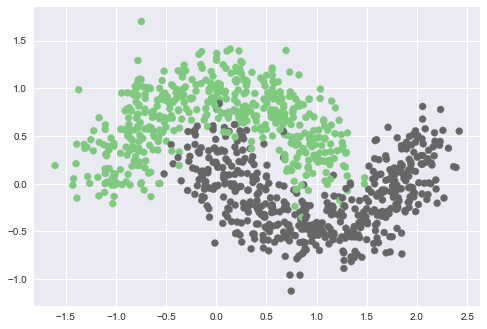

In [109]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.show()

## Model and Helper functions

In [110]:
def sigmoid(x):
    return (1.0)/(1+np.exp(-x))

In [111]:
sigmoid(5)

0.9933071490757153

## Implement Perceptron Algo

- Learn the wieghts
- Reduce the loss
- Make predictions

In [112]:
def predict(X,weights):
    '''X is a matrix of (m,n+1)'''
    return sigmoid(np.dot(X,weights))


def loss(X,Y,weights):
    ypred=predict(X,weights)
    s=np.mean((-Y)*np.log(ypred)-(1-Y)*(np.log(1-ypred)))
    return s

def update(X,Y,weights,learning_rate):
    '''Update the weights for one epoc'''
    Y_=predict(X,weights)
    grad=np.dot(X.T,Y_-Y)
    weights=weights-learning_rate*grad/float(X.shape[0])
    return weights
    
def train(X,Y,learning_rate=0.5,max_iter=100):
    
    ## Modify the input matrix to add 1
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    
    weights=np.zeros(X.shape[1])
    losses=[]
    
    #Iterate over max_iter
    for i in range(max_iter):
        weights=update(X,Y,weights,learning_rate)
        
        if i%10==0:
            l=loss(X,Y,weights)
            losses.append(l)
            print(f"in {i} iter the loss is {l}")
            
    
    return weights

In [113]:
weights=train(X,Y,max_iter=500,learning_rate=0.8)

in 0 iter the loss is 0.623394404707564
in 10 iter the loss is 0.4133752668303554
in 20 iter the loss is 0.3672227396734005
in 30 iter the loss is 0.3457319906563341
in 40 iter the loss is 0.332725090168954
in 50 iter the loss is 0.32388927035292014
in 60 iter the loss is 0.31752192195318546
in 70 iter the loss is 0.31277041695432833
in 80 iter the loss is 0.3091400472701549
in 90 iter the loss is 0.30631675576109524
in 100 iter the loss is 0.30408967977541496
in 110 iter the loss is 0.3023118889919357
in 120 iter the loss is 0.3008782207097753
in 130 iter the loss is 0.2997118086520217
in 140 iter the loss is 0.2987554766255581
in 150 iter the loss is 0.29796604477751043
in 160 iter the loss is 0.2973104629953905
in 170 iter the loss is 0.2967631292725991
in 180 iter the loss is 0.29630399617106
in 190 iter the loss is 0.29591721227259
in 200 iter the loss is 0.29559013325891975
in 210 iter the loss is 0.2953125924342603
in 220 iter the loss is 0.2950763560012318
in 230 iter the loss 

## Make predictions

In [114]:
def getPredictions(X_test,weights,label=True):
    if X_test.shape[1]!=weights.shape[0]:
        ones=np.ones((X_test.shape[0],1))
        X_test=np.hstack((ones,X_test))
    
    probs=predict(X_test,weights)
    #|probs=np.array(probs,dtype="uint8")
    
    if not label:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels
    

In [124]:
x1=np.linspace(-2,3,10)
x1

array([-2.        , -1.44444444, -0.88888889, -0.33333333,  0.22222222,
        0.77777778,  1.33333333,  1.88888889,  2.44444444,  3.        ])

In [125]:
x2=-(weights[0]+weights[1]*x1)/weights[2]
x2

array([-0.35239086, -0.21759579, -0.08280071,  0.05199436,  0.18678943,
        0.32158451,  0.45637958,  0.59117466,  0.72596973,  0.86076481])

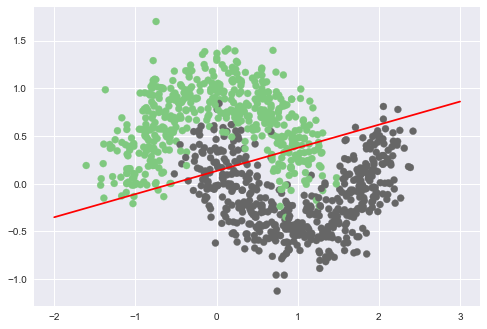

In [126]:
plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Accent)
plt.plot(x1,x2,c="red")
plt.show()

## Find Accuracy

In [118]:
def accuracy(Ypred,Y):
    return np.sum(Ypred==Y)/Y.shape[0]

In [119]:
Ypred=getPredictions(X,weights)
Ypred

array([0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 1.

In [120]:
accuracy(Ypred,Y)

0.868